In [1]:
import trapping
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
# %matplotlib notebook

In [2]:
N_sites = 50
gamma = 1.5
beta = 1
T = 500
k = 1
starting_site = 0
alpha = 1


In [3]:
sim1 = trapping.simulation(N_sites, gamma, beta, T, k, starting_site, alpha)


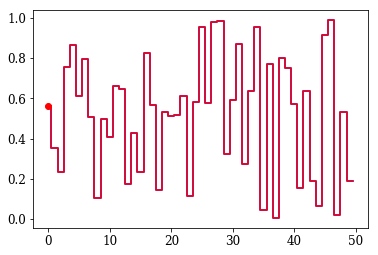

In [4]:
position = sim1.get_position()

initial_utilities = sim1.utility()
new_utilities = sim1.updated_utility()
plt.step(np.arange(N_sites)+0.5, initial_utilities, color='blue')
plt.step(np.arange(N_sites)+0.5, new_utilities, color='red')
plt.plot(position, new_utilities[position], 'ro')
plt.show()

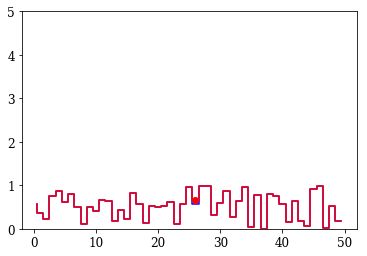

In [5]:

sim1.step()

position = sim1.get_position()
initial_utilities = sim1.utility()
new_utilities = sim1.updated_utility()
plt.figure()
plt.step(np.arange(N_sites)+0.5, initial_utilities, color='blue')
plt.step(np.arange(N_sites)+0.5, new_utilities, color='red')
plt.plot(position, new_utilities[position], 'ro')
plt.ylim(0,5)
plt.show()

ValueError: I/O operation on closed file

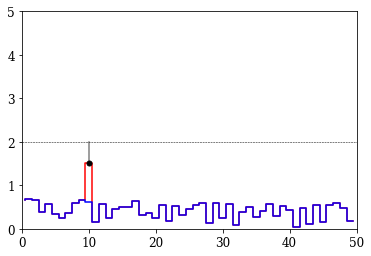

In [11]:
import matplotlib.animation as animation

N_sites = 50
gamma = 1.5
beta = 0.5
T = int(1e4)
k = 15
starting_site = 0
alpha = 1

sim1 = trapping.simulation(N_sites, gamma, beta, T, k, starting_site, alpha)
# sim1.constant_utilities()



position = sim1.get_position()
initial_utilities = np.log(1+np.array(sim1.utility()))
new_utilities = np.log(1+np.array(sim1.updated_utility()))

positions = np.zeros(T)
time = np.linspace(0,1000,T)

positions[0] = position

traj_start_pos = 2

fig, ax = plt.subplots()
#trajectory being drawed
line4, = ax.step([position], [1], alpha=0.5, color='black')
#line between trajectory and ball
line5, = ax.plot([position,position],[new_utilities[position],2], color='black', alpha=0.5)
#effective and subjective utilities
line1, = ax.step(np.arange(N_sites)+0.5, new_utilities, color='red')
line2, = ax.step(np.arange(N_sites)+0.5, initial_utilities, color='blue')
#ball
line3, = ax.plot(position, new_utilities[position], 'ro', color='black', ms=5)
#line for the beginning of the trajectory
line6, = ax.plot([0,N_sites],[traj_start_pos,traj_start_pos],'--',color='black', lw=0.5)
ax.set_xlim(0,N_sites)
ax.set_ylim(0,5)


def animate(i):
    sim1.step()
    position = sim1.get_position()
    positions[i] = position
    initial_utilities = np.log(1+np.array(sim1.utility()))
    new_utilities = np.log(1+np.array(sim1.updated_utility()))
    line1.set_data(np.arange(N_sites)+0.5, new_utilities)
    line3.set_data(position, new_utilities[position])
#     j = np.min(i,50)
    j = min(i,50)
    line4.set_data(positions[:j],time[:j][::-1]+2)
    line5.set_data([position,position, positions[i-1]], [new_utilities[position], traj_start_pos, traj_start_pos])
    return [line1, line3, line4,line5]
    


FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)


with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(T):
        animate(i)
        writer.grab_frame()
# anim = animation.FuncAnimation(fig, animate, interval=400, blit=True, frames=range(T))
# FFwriter = animation.FFMpegWriter(fps=15)
# anim.save('test.mp4', writer=writer)


In [7]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [32]:
np.argmin(np.abs(5-aaaa))

50

In [23]:
anim


<IPython.core.display.Javascript object>


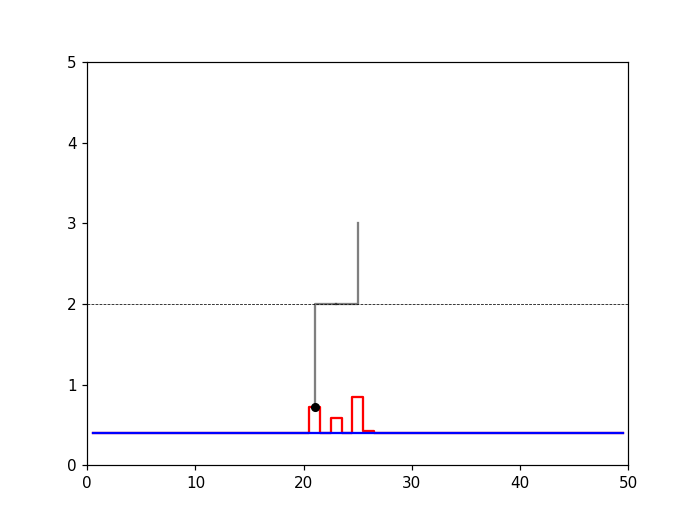

In [47]:
import matplotlib.animation as animation

N_sites = 50
gamma = 1.5
beta = 1
T = int(1e4)
k = 8
starting_site = int(N_sites/2)
alpha = 1

sim1 = trapping.simulation(N_sites, gamma, beta, T, k, starting_site, alpha)
sim1.constant_utilities()



position = sim1.get_position()
initial_utilities = np.log(1+np.array(sim1.utility()))
new_utilities = np.log(1+np.array(sim1.updated_utility()))

positions = np.zeros(T)
time = np.linspace(0,1000,T)

positions[0] = position

fig, ax = plt.subplots()
#trajectory being drawed
line4, = ax.step([position], [1], alpha=0.5, color='black')
#line between trajectory and ball
line5, = ax.plot([position,position],[new_utilities[position],2], color='black', alpha=0.5)
#effective and subjective utilities
line1, = ax.step(np.arange(N_sites)+0.5, new_utilities, color='red')
line2, = ax.step(np.arange(N_sites)+0.5, initial_utilities, color='blue')
#ball
line3, = ax.plot(position, new_utilities[position], 'ro', color='black', ms=5)
#line for the beginning of the trajectory
line6, = ax.plot([0,N_sites],[2,2],'--',color='black', lw=0.5)
ax.set_xlim(0,N_sites)
ax.set_ylim(0,5)
    
def animate(i):
    current_pos = sim1.get_position()
    jump_probs = [1/3.,1/3.,1/6.,1/6.]
    proposed_pos = np.random.choice([(current_pos+1), (current_pos-1), current_pos + 2, current_pos-2],p=jump_probs) % N_sites
    sim1.attempt(proposed_pos)
    position = sim1.get_position()
    positions[i] = position
    initial_utilities = np.log(1+np.array(sim1.utility()))
    new_utilities = np.log(1+np.array(sim1.updated_utility()))
    line1.set_data(np.arange(N_sites)+0.5, new_utilities)
    line3.set_data(position, new_utilities[position])
    line4.set_data(positions[:i],time[:i][::-1]+2)
    line5.set_data([position,position, positions[i-1]], [new_utilities[position], 2, 2])
    return [line1, line3, line4,line5]
    
anim = animation.FuncAnimation(fig, animate, interval=400, blit=False, frames=range(T))

In [48]:
import networkx as nx

In [49]:
G = nx.random_regular_graph(3,n=N_sites)

In [50]:
np.random.choice(G[3])

22

<IPython.core.display.Javascript object>


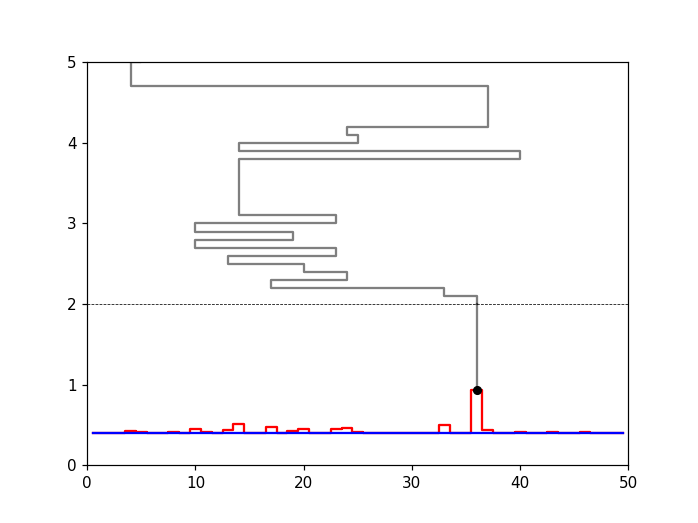

In [52]:
import matplotlib.animation as animation

N_sites = 50
gamma = 1.5
beta = 1
T = int(1e4)
k = 8
starting_site = int(N_sites/2)
alpha = 1

G = nx.random_regular_graph(7,n=N_sites)

sim1 = trapping.simulation(N_sites, gamma, beta, T, k, starting_site, alpha)
sim1.constant_utilities()



position = sim1.get_position()
initial_utilities = np.log(1+np.array(sim1.utility()))
new_utilities = np.log(1+np.array(sim1.updated_utility()))

positions = np.zeros(T)
time = np.linspace(0,1000,T)

positions[0] = position

fig, ax = plt.subplots()
#trajectory being drawed
line4, = ax.step([position], [1], alpha=0.5, color='black')
#line between trajectory and ball
line5, = ax.plot([position,position],[new_utilities[position],2], color='black', alpha=0.5)
#effective and subjective utilities
line1, = ax.step(np.arange(N_sites)+0.5, new_utilities, color='red')
line2, = ax.step(np.arange(N_sites)+0.5, initial_utilities, color='blue')
#ball
line3, = ax.plot(position, new_utilities[position], 'ro', color='black', ms=5)
#line for the beginning of the trajectory
line6, = ax.plot([0,N_sites],[2,2],'--',color='black', lw=0.5)
ax.set_xlim(0,N_sites)
ax.set_ylim(0,5)
    
def animate(i):
    current_pos = sim1.get_position()
    proposed_pos = np.random.choice(G[current_pos]) 
    sim1.attempt(proposed_pos)
    position = sim1.get_position()
    positions[i] = position
    initial_utilities = np.log(1+np.array(sim1.utility()))
    new_utilities = np.log(1+np.array(sim1.updated_utility()))
    line1.set_data(np.arange(N_sites)+0.5, new_utilities)
    line3.set_data(position, new_utilities[position])
    line4.set_data(positions[:i],time[:i][::-1]+2)
    line5.set_data([position,position, positions[i-1]], [new_utilities[position], 2, 2])
    return [line1, line3, line4,line5]
    
anim = animation.FuncAnimation(fig, animate, interval=400, blit=False, frames=range(T))